# Artificial matrix study II

In [1]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline

np.set_printoptions(suppress=True, precision=2)

sns.set(font_scale=2.0)

#### Git machinery

In [2]:
run_old_version = False
if run_old_version:
    hash_when_file_was_written = '5273391d742b9de04a97883c9765403b38ecfe03'
    hash_at_the_moment = subprocess.check_output(["git", 'rev-parse', 'HEAD']).strip()
    print('Actual hash', hash_at_the_moment)
    
    print('Hash of the commit used to run the simulation', hash_when_file_was_written)
    subprocess.call(['git', 'checkout', hash_when_file_was_written])

In [3]:
from network import BCPNNFast, NetworkManager
from plotting_functions import plot_winning_pattern, plot_weight_matrix
from analysis_functions import calculate_recall_success, calculate_timings
from connectivity_functions import artificial_connectivity_matrix
from analysis_functions import calculate_recall_success_sequences
from connectivity_functions import create_artificial_manager, calculate_random_sequence

## One sequence

In [4]:
# Patterns parameters
hypercolumns = 4
minicolumns = 50
n_patterns = 10

dt = 0.001

# Random seed
prng = np.random.RandomState(seed=2)

n = 10
T_cue = 0.100
T_recall = 3.0


sequences = [[0, 1, 2, 3, 4]]

#### Intensity

In [5]:
value = 1.0
inhibition = -1
decay_factor = 0.5
sequence_decay = 1.0
extension = 0

aux = []
n_to_recall = 0
values = np.logspace(-2, 2, 10)
for value in values:
    manager = create_artificial_manager(hypercolumns, minicolumns, sequences, value, inhibition, extension,
                                    decay_factor,
                                    sequence_decay, dt, BCPNNFast, NetworkManager, ampa=True)
    sequence_to_recall = sequences[n_to_recall]
    success = calculate_recall_success(manager, T_recall=T_recall, I_cue=sequence_to_recall[0], T_cue=T_cue, n=n,
                                   patterns_indexes=sequence_to_recall)

    aux.append(success)

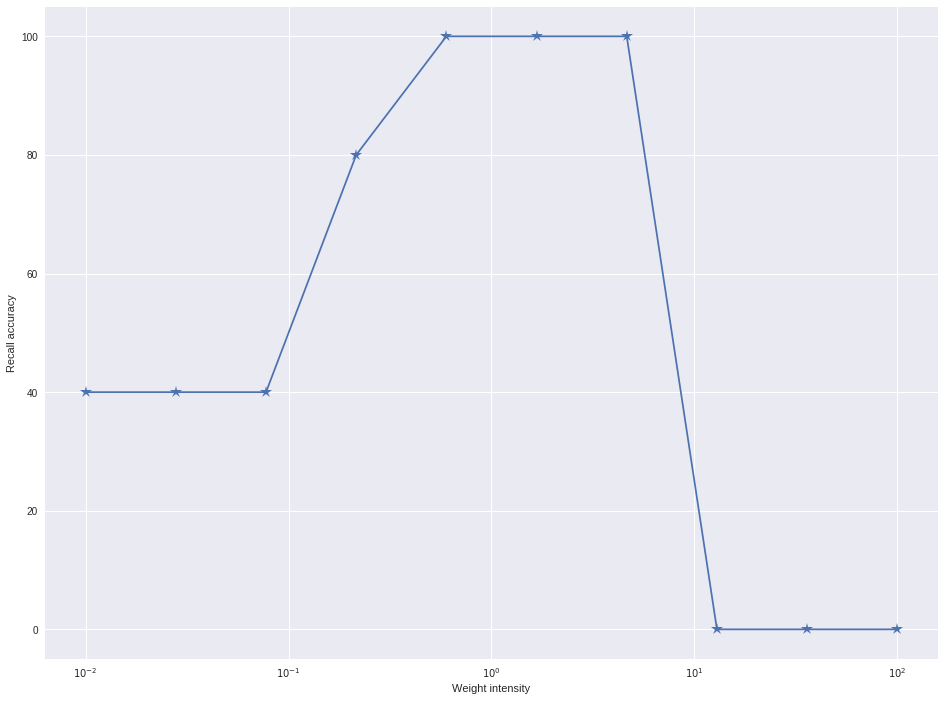

In [6]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.semilogx(values, aux, '*-', markersize=13)

ax.set_xlabel('Weight intensity')
ax.set_ylabel('Recall accuracy')

ax.set_ylim([-5, 105]);

When the values are very small the neuron does not make the transition. Same thing for very high values, why?
Two points:
* The right part of the graph is caused by a very strong ampa connectivity that keeps the pattern in place. As it can be shown by eliminating the effects of AMPA.
* The left part of the pattern is eliminated by eliminating the extension.

#### Inhibition

In [7]:
value = 1.0
inhibition = -1
decay_factor = 0.5
sequence_decay = 1.0
extension = 2

aux = []
n_to_recall = 0
inhibitions = -1 * np.logspace(-2, 2, 10)
for inhibition in inhibitions:
    manager = create_artificial_manager(hypercolumns, minicolumns, sequences, value, inhibition, extension,
                                    decay_factor,
                                    sequence_decay, dt, BCPNNFast, NetworkManager)
    sequence_to_recall = sequences[n_to_recall]
    success = calculate_recall_success(manager, T_recall=T_recall, I_cue=sequence_to_recall[0], T_cue=T_cue, n=n,
                                   patterns_indexes=sequence_to_recall)

    aux.append(success)

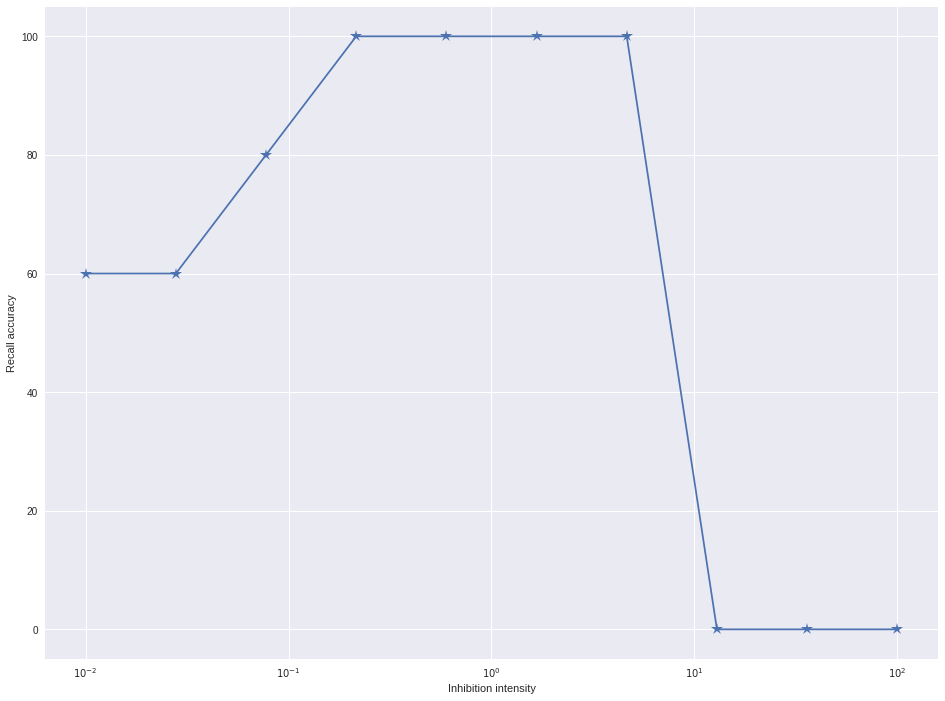

In [8]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.semilogx(-inhibitions, aux, '*-', markersize=13)

ax.set_xlabel('Inhibition intensity')
ax.set_ylabel('Recall accuracy')

ax.set_ylim([-5, 105]);

If the inhibition is too strong the the sequence is not completed

#### Decay factor

In [9]:
value = 1.0
inhibition = -1
decay_factor = 0.5
sequence_decay = 1.0
extension = 2

aux = []
n_to_recall = 0
decay_factors = np.linspace(0.1, 1.1, 11)
for decay_factor in decay_factors:
    manager = create_artificial_manager(hypercolumns, minicolumns, sequences, value, inhibition, extension,
                                    decay_factor,
                                    sequence_decay, dt, BCPNNFast, NetworkManager)
    sequence_to_recall = sequences[n_to_recall]
    success = calculate_recall_success(manager, T_recall=T_recall, I_cue=sequence_to_recall[0], T_cue=T_cue, n=n,
                                   patterns_indexes=sequence_to_recall)

    aux.append(success)

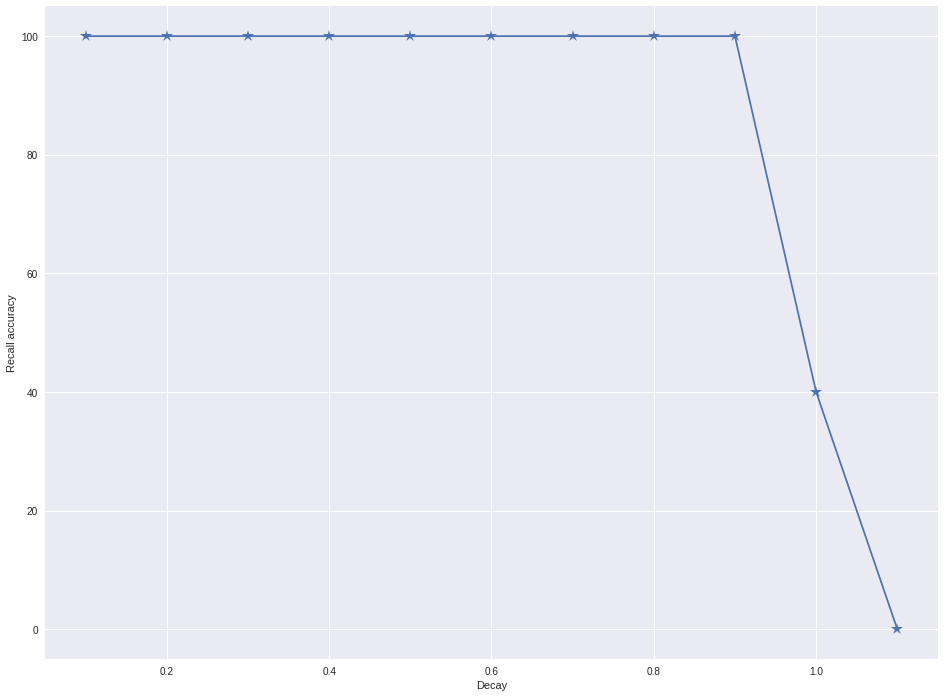

In [10]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(decay_factors, aux, '*-', markersize=13)

ax.set_xlabel('Decay')
ax.set_ylabel('Recall accuracy')

ax.set_ylim([-5, 105]);

## Two sequences (Independent)

In [11]:
# Patterns parameters
hypercolumns = 4
minicolumns = 50
n_patterns = 10

dt = 0.001

# Random seed
prng = np.random.RandomState(seed=2)

n = 10
T_cue = 0.100
T_recall = 3.0


sequences = [[0, 1, 2, 3, 4], [5, 6, 7, 8, 9]]

#### Intensity

In [12]:
value = 1.0
inhibition = -1
decay_factor = 0.5
sequence_decay = 1.0
extension = 0

aux = []
n_to_recall = 0
values = np.logspace(-2, 2, 10)
for value in values:
    manager = create_artificial_manager(hypercolumns, minicolumns, sequences, value, inhibition, extension,
                                    decay_factor,
                                    sequence_decay, dt, BCPNNFast, NetworkManager, ampa=True)
    sequence_to_recall = sequences[n_to_recall]
    success = calculate_recall_success(manager, T_recall=T_recall, I_cue=sequence_to_recall[0], T_cue=T_cue, n=n,
                                   patterns_indexes=sequence_to_recall)

    aux.append(success)

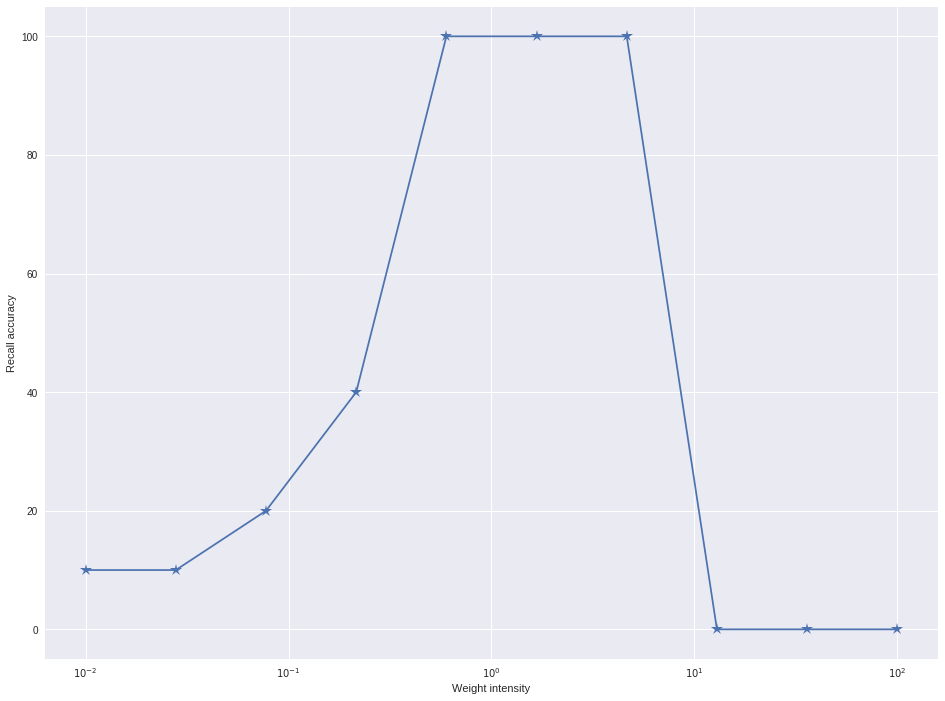

In [13]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.semilogx(values, aux, '*-', markersize=13)

ax.set_xlabel('Weight intensity')
ax.set_ylabel('Recall accuracy')

ax.set_ylim([-5, 105]);

#### Inhibition


In [14]:
value = 1.0
inhibition = -1
decay_factor = 0.5
sequence_decay = 1.0
extension = 2

aux = []
n_to_recall = 0
inhibitions = -1 * np.logspace(-2, 2, 10)
for inhibition in inhibitions:
    manager = create_artificial_manager(hypercolumns, minicolumns, sequences, value, inhibition, extension,
                                    decay_factor,
                                    sequence_decay, dt, BCPNNFast, NetworkManager)
    sequence_to_recall = sequences[n_to_recall]
    success = calculate_recall_success(manager, T_recall=T_recall, I_cue=sequence_to_recall[0], T_cue=T_cue, n=n,
                                   patterns_indexes=sequence_to_recall)

    aux.append(success)

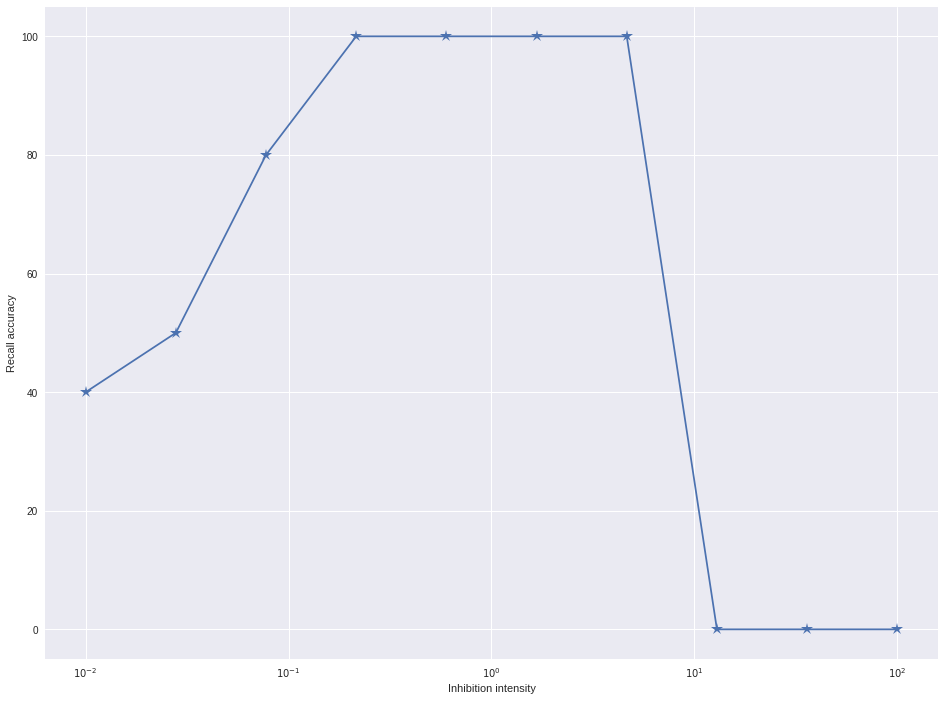

In [15]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.semilogx(-inhibitions, aux, '*-', markersize=13)

ax.set_xlabel('Inhibition intensity')
ax.set_ylabel('Recall accuracy')

ax.set_ylim([-5, 105]);

#### Decay factor

In [16]:
value = 1.0
inhibition = -1
decay_factor = 0.5
sequence_decay = 1.0
extension = 2

aux = []
n_to_recall = 0
decay_factors = np.linspace(0.1, 1.1, 11)
for decay_factor in decay_factors:
    manager = create_artificial_manager(hypercolumns, minicolumns, sequences, value, inhibition, extension,
                                    decay_factor,
                                    sequence_decay, dt, BCPNNFast, NetworkManager)
    sequence_to_recall = sequences[n_to_recall]
    success = calculate_recall_success(manager, T_recall=T_recall, I_cue=sequence_to_recall[0], T_cue=T_cue, n=n,
                                   patterns_indexes=sequence_to_recall)

    aux.append(success)

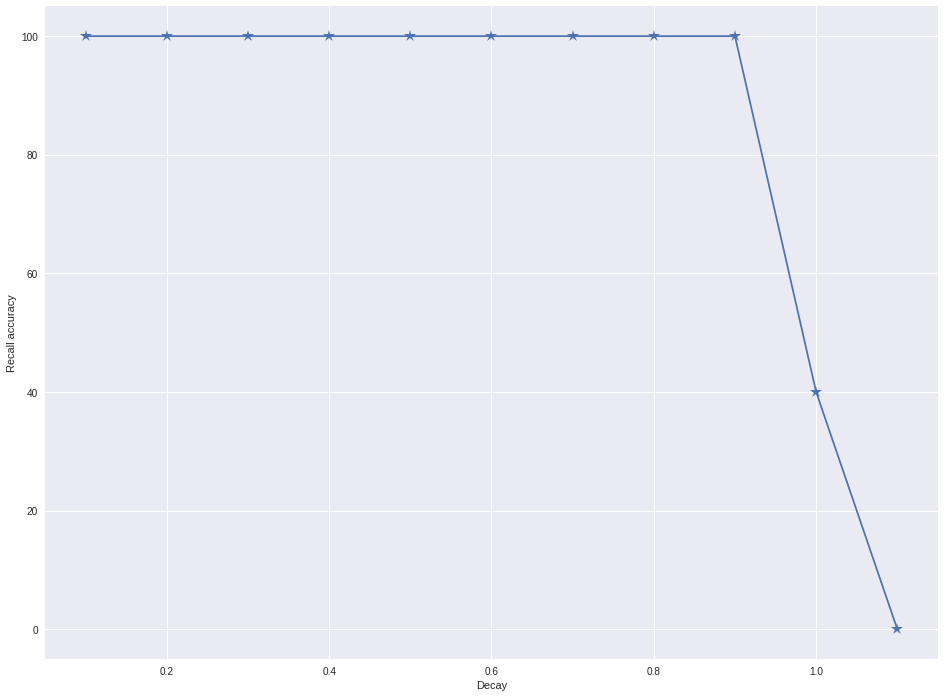

In [17]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(decay_factors, aux, '*-', markersize=13)

ax.set_xlabel('Decay')
ax.set_ylabel('Recall accuracy')

ax.set_ylim([-5, 105]);

## Two sequences dependent

In [18]:
# Patterns parameters
hypercolumns = 4
minicolumns = 50
n_patterns = 10

dt = 0.001

# Random seed
prng = np.random.RandomState(seed=2)

n = 10
T_cue = 0.100
T_recall = 3.0


sequences = [[0, 1, 2, 3, 4, 5], [3, 6, 7, 8, 9, 10]]

#### Intensity

In [19]:
value = 1.0
inhibition = -1
decay_factor = 0.5
sequence_decay = 1.0
extension = 0

aux = []
n_to_recall = 0
values = np.logspace(-2, 2, 10)
for value in values:
    manager = create_artificial_manager(hypercolumns, minicolumns, sequences, value, inhibition, extension,
                                    decay_factor,
                                    sequence_decay, dt, BCPNNFast, NetworkManager, ampa=True)
    sequence_to_recall = sequences[n_to_recall]
    success = calculate_recall_success(manager, T_recall=T_recall, I_cue=sequence_to_recall[0], T_cue=T_cue, n=n,
                                   patterns_indexes=sequence_to_recall)

    aux.append(success)

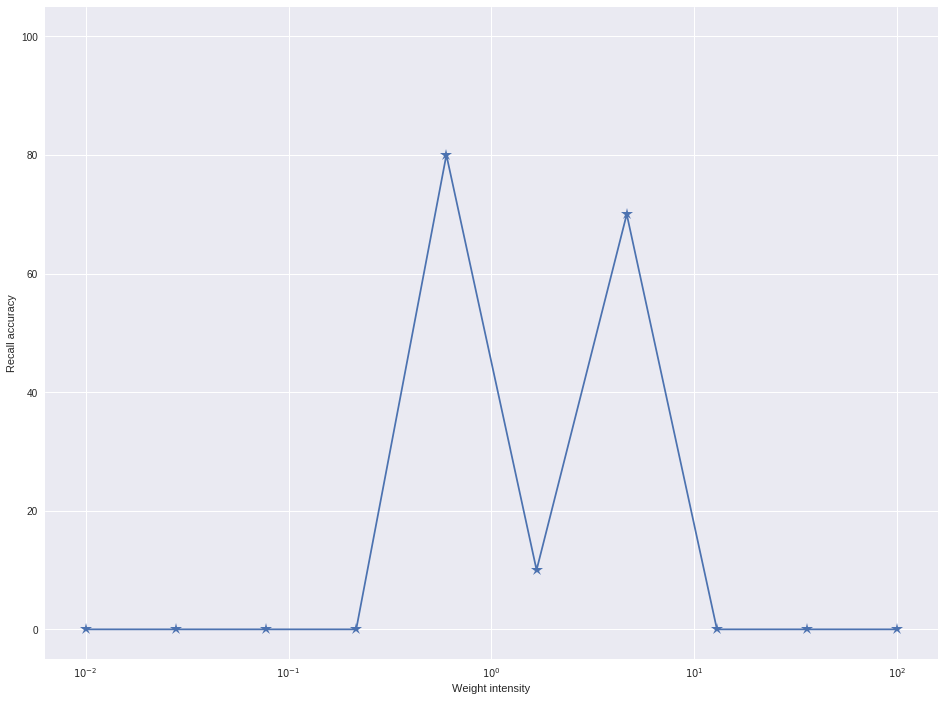

In [20]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.semilogx(values, aux, '*-', markersize=13)

ax.set_xlabel('Weight intensity')
ax.set_ylabel('Recall accuracy')

ax.set_ylim([-5, 105]);

#### Inhibition


In [21]:
value = 1.0
inhibition = -1
decay_factor = 0.5
sequence_decay = 1.0
extension = 2

aux = []
n_to_recall = 0
inhibitions = -1 * np.logspace(-2, 2, 10)
for inhibition in inhibitions:
    manager = create_artificial_manager(hypercolumns, minicolumns, sequences, value, inhibition, extension,
                                    decay_factor,
                                    sequence_decay, dt, BCPNNFast, NetworkManager)
    sequence_to_recall = sequences[n_to_recall]
    success = calculate_recall_success(manager, T_recall=T_recall, I_cue=sequence_to_recall[0], T_cue=T_cue, n=n,
                                   patterns_indexes=sequence_to_recall)

    aux.append(success)

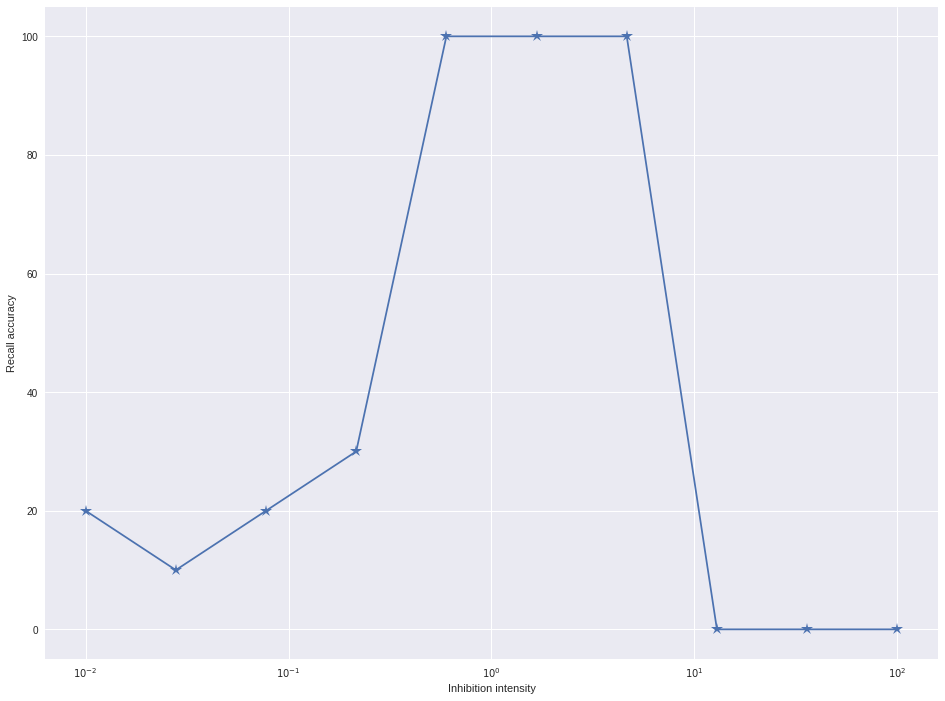

In [22]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.semilogx(-inhibitions, aux, '*-', markersize=13)

ax.set_xlabel('Inhibition intensity')
ax.set_ylabel('Recall accuracy')

ax.set_ylim([-5, 105]);

#### Decay factor

In [23]:
value = 1.0
inhibition = -1
decay_factor = 0.5
sequence_decay = 1.0
extension = 2

aux = []
n_to_recall = 0
decay_factors = np.linspace(0.1, 1.1, 11)
for decay_factor in decay_factors:
    manager = create_artificial_manager(hypercolumns, minicolumns, sequences, value, inhibition, extension,
                                    decay_factor,
                                    sequence_decay, dt, BCPNNFast, NetworkManager)
    sequence_to_recall = sequences[n_to_recall]
    success = calculate_recall_success(manager, T_recall=T_recall, I_cue=sequence_to_recall[0], T_cue=T_cue, n=n,
                                   patterns_indexes=sequence_to_recall)

    aux.append(success)

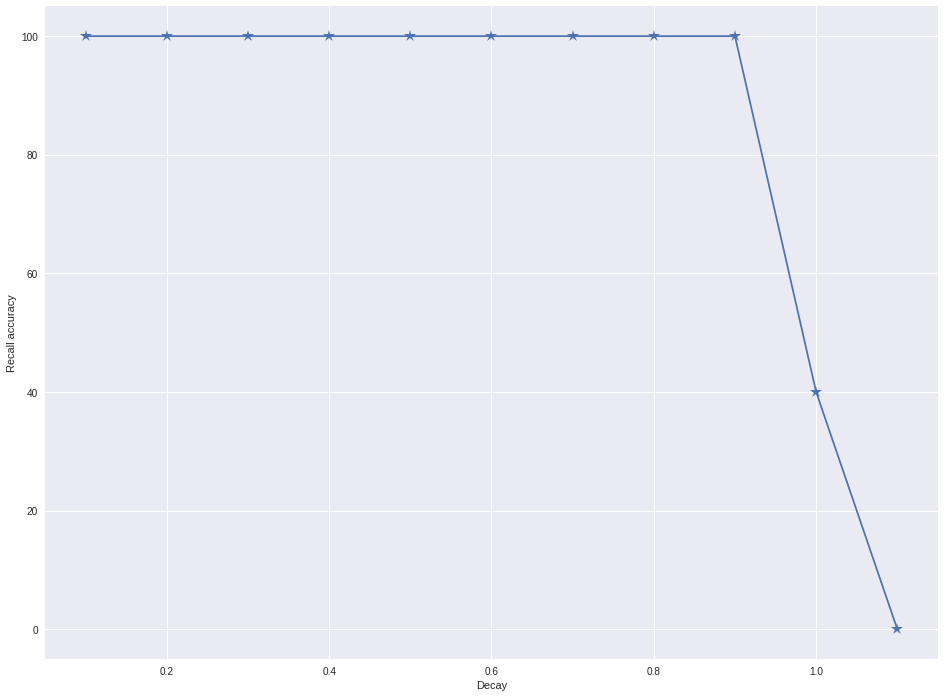

In [24]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(decay_factors, aux, '*-', markersize=13)

ax.set_xlabel('Decay')
ax.set_ylabel('Recall accuracy')

ax.set_ylim([-5, 105]);

#### Sequence Decay

In [25]:
value = 1.0
inhibition = -1
decay_factor = 0.5
sequence_decay = 1.0
extension = 2

aux = []
n_to_recall = 0
sequence_decays = np.linspace(0.1, 1.1, 11)
for sequence_decay in sequence_decays:
    manager = create_artificial_manager(hypercolumns, minicolumns, sequences, value, inhibition, extension,
                                    decay_factor,
                                    sequence_decay, dt, BCPNNFast, NetworkManager)
    sequence_to_recall = sequences[n_to_recall]
    success = calculate_recall_success(manager, T_recall=T_recall, I_cue=sequence_to_recall[0], T_cue=T_cue, n=n,
                                   patterns_indexes=sequence_to_recall)

    aux.append(success)



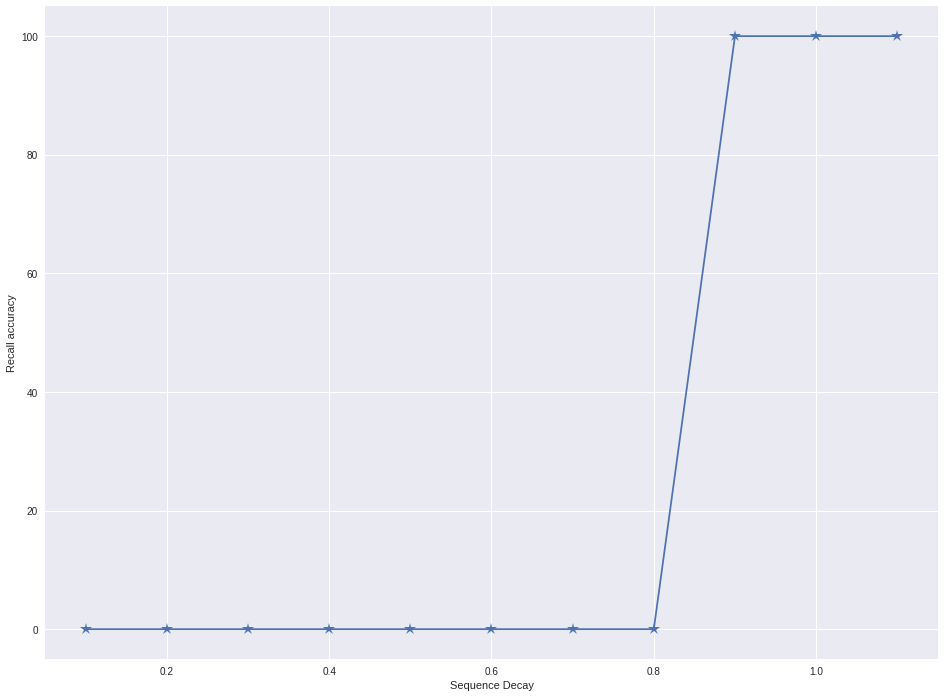

In [26]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(decay_factors, aux, '*-', markersize=13)

ax.set_xlabel('Sequence Decay')
ax.set_ylabel('Recall accuracy')

ax.set_ylim([-5, 105]);

## Analysis in terms of sequence decay and decay factor

In [27]:
value = 1.0
inhibition = -1
decay_factor = 0.5
sequence_decay = 1.0
extension = 2

sequence_decays = np.linspace(0.1, 1.1, 11)
decay_factors = np.linspace(0.1, 1.1, 11)

success_array = np.zeros((sequence_decays.size, decay_factors.size, len(sequences)))

for index_1, sequence_decay in enumerate(sequence_decays):
    print(index_1)
    for index_2, decay_factor in enumerate(decay_factors):
        manager = create_artificial_manager(hypercolumns, minicolumns, sequences, value, inhibition, extension,
                                            decay_factor,
                                            sequence_decay, dt, BCPNNFast, NetworkManager, ampa=True, beta=False)

        for n_to_recall in range(len(sequences)):
            sequence_to_recall = sequences[n_to_recall]
            success = calculate_recall_success(manager, T_recall=T_recall, I_cue=sequence_to_recall[0], T_cue=T_cue, n=n,
                                       patterns_indexes=sequence_to_recall)

            success_array[index_1, index_2, n_to_recall] = success

0
1
2
3
4
5
6
7
8
9
10


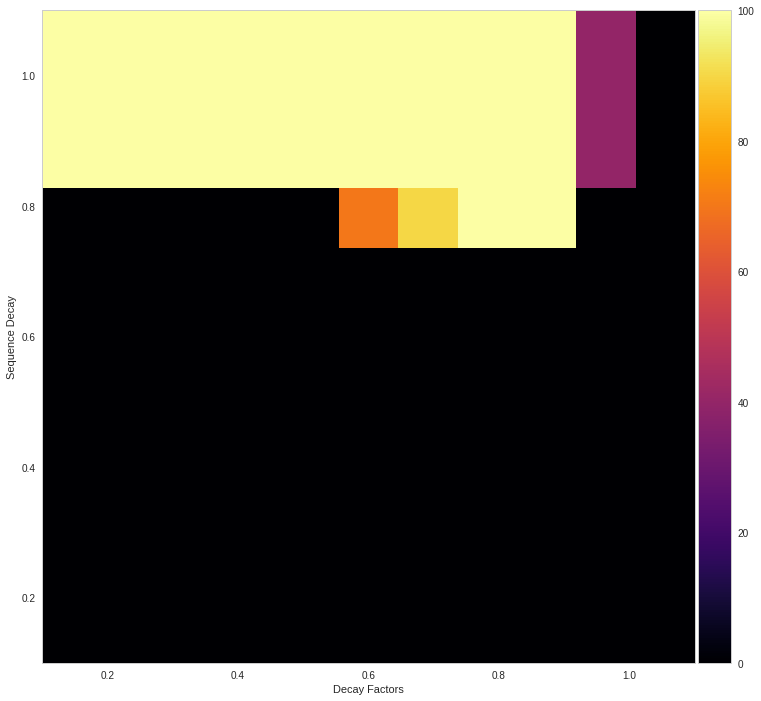

In [28]:
sns.set_style("whitegrid", {'axes.grid': False})

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
cmap = 'inferno'
extent = [sequence_decays[0], sequence_decays[-1], decay_factors[0], decay_factors[-1]]
im = ax.imshow(success_array[..., 0], cmap=cmap, interpolation='None', extent=extent, origin='lower')

ax.set_xlabel('Decay Factors')
ax.set_ylabel('Sequence Decay')

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical');

#### Git machinery

In [29]:
if run_old_version:
    subprocess.call(['git', 'checkout', 'master'])